In [1]:
# Install required libraries:
# - flask: A lightweight web framework for Python to create the web app.
# - diffusers: A library for working with diffusion models (e.g., Stable Diffusion).
# - transformers: A library for natural language processing (NLP) and model loading.
# - torch: PyTorch, the deep learning framework used by diffusers and transformers.
# - accelerate: A library to optimize and speed up model inference on hardware (e.g., GPU).
!pip install flask diffusers transformers torch accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
# Download the Stable Diffusion v1-4 model from Hugging Face Hub:
# - repo_id: The repository ID of the model (CompVis/stable-diffusion-v1-4).
# - cache_dir: The directory where the model will be cached (default is /root/.cache/huggingface).
# This function downloads the model files and stores them locally for faster access in future runs.
from huggingface_hub import snapshot_download

snapshot_download(
    repo_id="CompVis/stable-diffusion-v1-4",
    cache_dir="/root/.cache/huggingface"
)

Fetching 33 files:   0%|          | 0/33 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

diffusion_pytorch_model.non_ema.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

(…)fusion_pytorch_model.non_ema.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

v1-variants-scores.jpg:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

'/root/.cache/huggingface/models--CompVis--stable-diffusion-v1-4/snapshots/133a221b8aa7292a167afc5127cb63fb5005638b'

In [4]:
# Load the Stable Diffusion model using the diffusers library:
# - StableDiffusionPipeline: A pipeline for generating images from text prompts using the Stable Diffusion model.
# - from_pretrained: Loads the pre-trained model from the specified repository (CompVis/stable-diffusion-v1-4).
# - cache_dir: Specifies the directory where the model is cached (/root/.cache/huggingface).
# - pipe.to("cuda"): Moves the model to the GPU for faster inference. Replace "cuda" with "cpu" if no GPU is available.
from diffusers import StableDiffusionPipeline

# Load the Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    cache_dir="/root/.cache/huggingface"
)
pipe.to("cuda")  # Ensure it uses the GPU

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [5]:
# Generate an image from a text prompt using the Stable Diffusion model:
# - prompt: The text description of the image you want to generate (e.g., "A futuristic cityscape at sunset").
# - pipe(prompt): Passes the prompt to the Stable Diffusion pipeline to generate an image.
# - .images[0]: Extracts the first image from the output (the pipeline can generate multiple images).
# - image.show(): Displays the generated image (works in environments that support image rendering).
prompt = "A futuristic cityscape at sunset"
image = pipe(prompt).images[0]

# Display the image
image.show()

  0%|          | 0/50 [00:00<?, ?it/s]

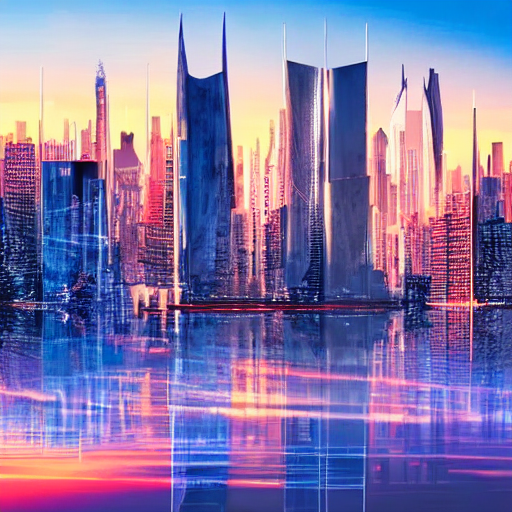

In [6]:
# Display the generated image inline in the notebook:
# - IPython.display: A module for displaying rich content (e.g., images, videos) in Jupyter notebooks or Google Colab.
# - display(image): Renders the image inline in the notebook for easy viewing.
from IPython.display import display
display(image)  # Display the image inline


In [7]:
# Install Node.js and npm (Node Package Manager):
# - nodejs: A JavaScript runtime for running server-side code.
# - npm: A package manager for installing and managing Node.js libraries.
# - -y: Automatically answers "yes" to all prompts during installation.
!apt-get install nodejs npm -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  gyp javascript-common libc-ares2 libjs-events libjs-highlight.js libjs-inherits
  libjs-is-typedarray libjs-psl libjs-source-map libjs-sprintf-js libjs-typedarray-to-buffer
  libnode-dev libnode72 libnotify-bin libnotify4 libuv1-dev node-abab node-abbrev node-agent-base
  node-ansi-regex node-ansi-styles node-ansistyles node-aproba node-archy node-are-we-there-yet
  node-argparse node-arrify node-asap node-asynckit node-balanced-match node-brace-expansion
  node-builtins node-cacache node-chalk node-chownr node-clean-yaml-object node-cli-table
  node-clone node-color-convert node-color-name node-colors node-columnify node-combined-stream
  node-commander node-console-control-strings node-copy-concurrently node-core-util-is
  node-coveralls node-cssom node-cssstyle node-debug node-decompress-response node-defaults
  node-delayed-stream n

In [3]:
# Install LocalTunnel globally using npm:
# - localtunnel: A tool to expose local servers to the internet with a public URL.
# - -g: Installs the package globally, making it available system-wide.
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
added 22 packages in 4s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏

In [9]:
# Import and start the Flask app in a separate thread:
# - importlib.util: A module for dynamically importing Python modules.
# - threading: A module for running tasks concurrently in separate threads.
# - app.run(port=5000, use_reloader=False): Starts the Flask app on port 5000 without reloading.
# - threading.Thread: Creates a new thread to run the Flask app, allowing the notebook to continue executing other commands.
from flask import Flask
import importlib.util
import threading

# Import and start Flask app
spec = importlib.util.spec_from_file_location("app", "/content/app.py")
app_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(app_module)
app = app_module.app

def run_app():
    app.run(port=5000, use_reloader=False)

thread = threading.Thread(target=run_app)
thread.start()

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

 * Serving Flask app 'app'
 * Debug mode: off


In [18]:
# Retrieve the tunnel password for LocalTunnel:
# - curl: A command-line tool for making HTTP requests.
# - https://loca.lt/mytunnelpassword: A URL provided by LocalTunnel to fetch the tunnel password (public IP address).
# This is required to access the LocalTunnel URL when password protection is enabled.
!curl https://loca.lt/mytunnelpassword

35.247.124.83

In [20]:
# Expose the Flask app running on port 5000 using LocalTunnel:
# - lt: The LocalTunnel command to create a public URL for a local server.
# --port 5000: Specifies the port on which the local server is running.
# This generates a public URL (e.g., https://random-subdomain.loca.lt) to access the Flask app.
!lt --port 5000

your url is: https://two-pets-mix.loca.lt
^C


Another way to run


In [1]:
# - curl: A command-line tool for making HTTP requests.
# - https://ipinfo.io/ip: A service that returns the public IP address of the machine.
# This IP address is required as the tunnel password to access the LocalTunnel URL.
!curl https://ipinfo.io/ip

35.247.124.83

In [8]:
# - nohup: Runs the command in the background and detaches it from the terminal.
# - > flask.log: Redirects the output of the Flask app to a log file (flask.log).
# - 2>&1: Redirects error messages to the same log file.
# - &: Runs the process in the background.
!nohup python app.py > flask.log 2>&1 &

# - lt: The LocalTunnel command to create a public URL for the Flask app.
# --port 5000: Specifies the port on which the Flask app is running.
!lt --port 5000

your url is: https://fresh-keys-turn.loca.lt
^C


Debugging

In [9]:
# List the contents of the /content/ directory:
# - ls: A command to list files and directories in the specified path.
# - /content/: The directory to list (default working directory in Google Colab).
# This is useful for verifying the files and folders in the current workspace.
!ls /content/

app.py	flask.log  sample_data	static	templates


In [ ]:
# Clear Hugging Face cache to free up space and avoid conflicts:
# - Remove the entire Hugging Face hub cache directory.
!rm -rf ~/.cache/huggingface/hub

# Remove the specific Stable Diffusion v1-4 model cache:
# - Delete the cached model files for CompVis/stable-diffusion-v1-4.
!rm -rf /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4

In [10]:
# Check the installation path of the LocalTunnel (lt) command:
# - which: A command to locate the executable file associated with a given command.
# - lt: The LocalTunnel command to expose local servers to the internet.
!which lt

/tools/node/bin/lt


In [ ]:
# List open files and processes using port 5000:
# - lsof: A command to list open files and the processes using them.
# - -i:5000: Filters the output to show only processes using port 5000.
# This is useful for checking if a service (e.g., Flask app) is running on the specified port.
!lsof -i:5000

In [ ]:
# Terminate a process forcefully by its Process ID (PID):
# - kill: A command to send signals to processes.
# - -9: Sends the SIGKILL signal, which forcefully terminates the process.
# - 11299: Replace this with the actual Process ID (PID) of the process you want to terminate.
!kill -9 11299

In [11]:
# Get the absolute path to the Hugging Face cache directory:
# - os.path.expanduser: Expands the ~ symbol to the user's home directory.
# - ~/.cache/huggingface: The default cache directory for Hugging Face models and datasets.
import os
print(os.path.expanduser("~/.cache/huggingface"))

/root/.cache/huggingface


In [12]:
# List the contents of the Hugging Face cache directory:
# - ls: A command to list files and directories.
# - ~/.cache/huggingface: The default cache directory for Hugging Face models and datasets.
!ls ~/.cache/huggingface

hub


In [13]:
# List the contents of the Hugging Face hub cache directory:
# - ls: A command to list files and directories.
# - /root/.cache/huggingface/hub/: The directory where Hugging Face caches downloaded models and datasets.
!ls /root/.cache/huggingface/hub/

models--CompVis--stable-diffusion-v1-4	version_diffusers_cache.txt


In [15]:
# List the contents of the specific Stable Diffusion v1-4 model snapshot directory:
# - ls: A command to list files and directories.
# - /root/.cache/huggingface/models--CompVis--stable-diffusion-v1-4/snapshots/133a221b8aa7292a167afc5127cb63fb5005638b: The directory containing the specific snapshot of the Stable Diffusion v1-4 model.
!ls /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/133a221b8aa7292a167afc5127cb63fb5005638b

feature_extractor  model_index.json  safety_checker  scheduler	text_encoder  tokenizer  unet  vae


In [16]:
# List the contents of the VAE (Variational Autoencoder) directory for the Stable Diffusion v1-4 model:
# - ls: A command to list files and directories.
# - /root/.cache/huggingface/models--CompVis--stable-diffusion-v1-4/snapshots/133a221b8aa7292a167afc5127cb63fb5005638b/vae: The directory containing the VAE component of the model.
!ls /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/133a221b8aa7292a167afc5127cb63fb5005638b/vae

# List the contents of the UNet directory for the Stable Diffusion v1-4 model:
# - ls: A command to list files and directories.
# - /root/.cache/huggingface/models--CompVis--stable-diffusion-v1-4/snapshots/133a221b8aa7292a167afc5127cb63fb5005638b/unet: The directory containing the UNet component of the model.
!ls /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/133a221b8aa7292a167afc5127cb63fb5005638b/unet

config.json  diffusion_pytorch_model.safetensors
config.json  diffusion_pytorch_model.safetensors
